# GRIP - The Spark Foundation- Data Science & Business Analytics Internship Jun- 2023
# Prediction using Supervised Machine Learnings
# Auther:- Mohammad Aamir Rangrez

# **Table of Contents:**
* Introduction
* Import Libraries
* Getting the Data
* Data Exploration/Analysis
* Data Preprocessing
    - Missing Data
    - Graph using Null
* Data viualization with scatter plots
* Preparing the training data for Linear Regression
    - Splitting the dataset from training the testing
    - Training Linear Regresion Model
* Prediction Scores
    - Evaluating Train and test scores
* Comparing actual Score and Predict Score
	- Training data Scores vs Predicted Scores
    - Testing data Scores vs Predicted Scores 
* Model Evaluation on Test Sample
    - Mean Absolute Error
	- Root Mean Square Error
	- T-Test
	- F-Test
* Submission 
	- Predictions
	- Alternate way to calculate 
* Summary

# Task 1

## Q: What is Supervised Machine Learning..?

* There is 4 type of Machine learning
    - Supervised
    - Unsupervised
    - Semi-Supervised
    - Reinforement
* Supervised Learning 
Supervised learning is when the model is getting trained on a labelled dataset. A labelled dataset is one that has both input and output parameters. In this type of learning both training and validation, datasets are labelled


* There is two type of Supervised Learning 
    - Classification
            - K-Nearest Neighbor
            - Naive Bayes
            - Descision Tree
            - Support Vector Machine
            - Logistic Regression
    - Regression
            - Linear Regression
            - Support Vector Regression
            - Decision Trees
            - Gaussian Progresses Regression
            - Ensemble Methods

# To predict the score of a student who studies for 9.25 hrs/ day

# Importing libraries

PANDAS,NUMPY for data manuplation.

Matplotlib,seaborn module for Data Visualisation.

sklearn for modelling

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing data set

In [2]:
url = "https://bit.ly/w-data"
scores = pd.read_csv(url)

In [3]:
print("first 5 element of the given dataset")
scores.head()

first 5 element of the given dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print('shape of the dataset --->',scores.shape)
print("Columns name --->", scores.columns)
print("columns Datatype-->", scores.dtypes)



shape of the dataset ---> (25, 2)
Columns name ---> Index(['Hours', 'Scores'], dtype='object')
columns Datatype--> Hours     float64
Scores      int64
dtype: object


# Exploratory Analysis of the DataSet

In [5]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# missing values

In [6]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

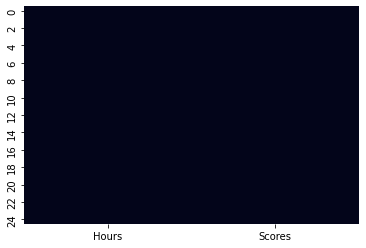

In [7]:
sns.heatmap(scores.isnull(), cbar=False)

Observation
        
           There is no missing value in tis dataset

In [8]:
scores.quantile([0.01,.05,.10,.15,.25,0.50,0.80,0.85,0.9,0.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


<AxesSubplot:>

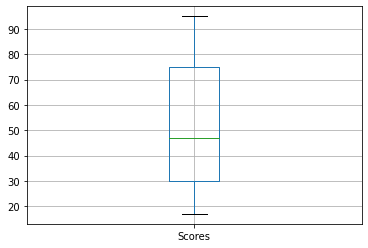

In [9]:
scores.boxplot(['Scores'])

<AxesSubplot:>

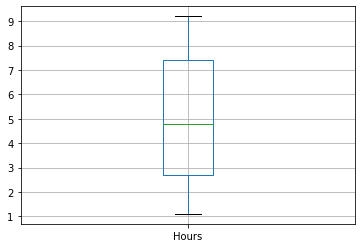

In [10]:
scores.boxplot(["Hours"])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


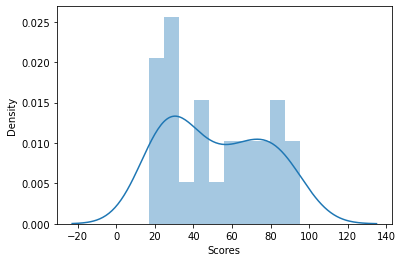

In [11]:
sns.distplot(scores['Scores'], bins=10)
plt.show()

<AxesSubplot:>

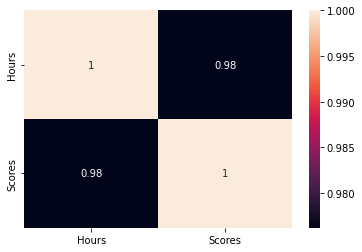

In [12]:
sns.heatmap(scores.corr(),annot=True)

Hours and Scores are highly Positively correlated to each other

# Data viualization with scatter plots

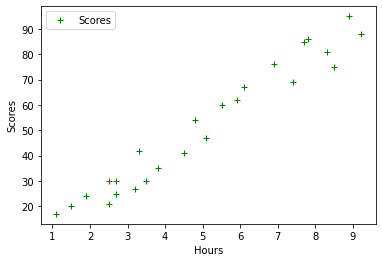

In [13]:
scores.plot(x='Hours', y = 'Scores',style = '+',color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

There is linear relationship between the umebr of hours and scores

# Preparing the training data for Linear Regression

Independent variable = Number of hours studied

Dependent variable = Scores obtained

In [14]:
x = scores.drop("Scores",axis=1)
y = scores['Scores']

# Splitting the dataset from training the testing  

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


# Training Linear Regression Model

In [17]:
scores_reg = LinearRegression()
scores_reg.fit(x_train, y_train)

LinearRegression()

# Prediction Scores

In [18]:
y_pred = scores_reg.predict(x_test)
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

# Evaluating Train and test scores 

In [19]:
print('Training Score : ', scores_reg.score(x_train, y_train))
print('Test score: ', scores_reg.score(x_test,y_test))

Training Score :  0.9496868783142939
Test score:  0.9420584734434517



# comparing Actul Score and predict Score

In [20]:
output = pd.DataFrame({'Actual Score':y_test,'preicted Score': y_pred, ' Residual': y_test-y_pred})
print(output.head())

    Actual Score  preicted Score   Residual
14            17       11.029003   5.970997
0             21       25.628017  -4.628017
17            24       19.371297   4.628703
6             88       95.494730  -7.494730
23            76       71.510634   4.489366


# To visualize the differences between actual score and predicted score 

# a) Training data Scores vs Predicted Scores 

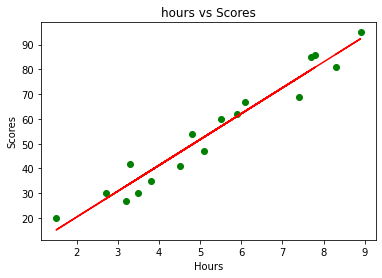

In [21]:
plt.scatter(x_train,y_train, color= 'green')
plt.plot(x_train, scores_reg.predict(x_train), color= 'red')
plt.title("hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# b) Testing data Scores vs Predicted Scores 

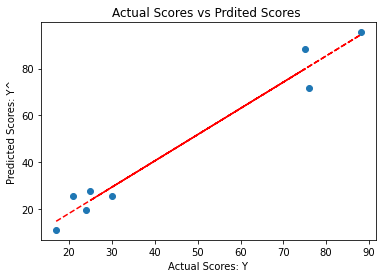

In [22]:
x = y_test
y = y_pred
plt.scatter(x,y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted Scores: Y^")
plt.title("Actual Scores vs Prdited Scores ")

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

# Model Evaluation on test sample

# Mean Absolute Error

In [23]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  5.936576124243742


# Root Mean Square Error

In [24]:
print('Root mean square error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error:  6.665333111498132


In [25]:
metrics.r2_score(y_test,y_pred)

0.9420584734434517

# T-test

In [26]:
from scipy import stats
t_statistic, pvalues = stats.ttest_ind(y_test, y_pred)
print('t-statistic -->', t_statistic)
print('P-value --> ', pvalues)

t-statistic --> -0.06749127427810271
P-value -->  0.9471450243074203


# F-Test 

In [27]:
f_statistic, pvalues = stats.f_oneway(y_test, y_pred)
print('f-statistic --> ', f_statistic)
print('P-value --> ',pvalues)

f-statistic -->  0.004555072103682067
P-value -->  0.9471450243074162


# What will be predicted score if a student study for 9.25 hrs in a days?

In [28]:
study_hrs = 9.25
score_pred = scores_reg.predict([[study_hrs]])
print("Number of hours = {}".format(study_hrs))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


# Alterntive way to calculate the score of the student 

using the formul  y = mx + c  where m = coeffiecient , c = intercept

In [29]:
y = scores_reg.coef_*9.25 + scores_reg.intercept_
y

array([96.016123])

In [30]:
print(x_test)

    Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9
9     2.7
3     8.5
16    2.5


In [31]:
print(y_test)

14    17
0     21
17    24
6     88
23    76
9     25
3     75
16    30
Name: Scores, dtype: int64


In [32]:
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

In [33]:
comp = pd.DataFrame({'Actual': [y_test],'predicted':[y_pred]})
comp

,Actual,predicted
0,14 17 0 21 17 24 6 88 23 76 9...,"[11.029002681968452, 25.628017214495113, 19.37..."


# Now we can see the actual and predicted.

# Thanks....:)